# **Assignment 12**
# **Polar aurora forecasting**

### **Data Analysis for Space Weather | Instructor: Prof Podladchikova | April, 2021**
### **by Victoria Krivova, Polina Starodumova**

The  objective  of  this assignment is  to learn  how  to model and  forecast  the  auroral oval boundaries including the forecasting of auroral electrojet index AL. The location of auroral oval is  important  for  many  space  weather  applications  as  it  can  create ground  induced сurrents  (auroral  electrojets),  cause  communication  problems,  increased  radiation  dose  in Low-Earth orbits (energetic electrons), etc.

In [1]:
# Import the libraries
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd
import numpy as np

**Firstly, our task is to reconstruct geomagnetic latitude of poleward, equatorward boundary of the auroral oval, and equatorward boundary of the diffuse aurora for various values of auroral electroject indices AL. For that, we create an array of AL indices of interest as well as an array with magnetic local time values:**

In [7]:
AL = np.array([-10,-100,-200,-300,-400,-500,-600,-700,-800])
t = np.linspace(0, 23, 24)

**Using values of special coefficients $b_{ij}$, we calculate the values of amplitudes $A_{ij}$ and phases $a_{ij}$:**

In [4]:
A00 = -0.07  + 24.54*np.log10(np.fabs(AL)) - 12.53*(np.log10(np.fabs(AL)))**2 + 2.15*(np.log10(np.fabs(AL)))**3
A10 = -10.06 + 19.83*np.log10(np.fabs(AL)) - 9.33*(np.log10(np.fabs(AL)))**2  + 1.24*(np.log10(np.fabs(AL)))**3
A20 = -4.44  + 7.47*np.log10(np.fabs(AL))  - 3.01*(np.log10(np.fabs(AL)))**2  + 0.25*(np.log10(np.fabs(AL)))**3
A30 = -3.77  + 7.9*np.log10(np.fabs(AL))   - 4.73*(np.log10(np.fabs(AL)))**2  + 0.91*(np.log10(np.fabs(AL)))**3

A01 = 1.61   + 23.21*np.log10(np.fabs(AL)) - 10.97*(np.log10(np.fabs(AL)))**2 + 2.03*(np.log10(np.fabs(AL)))**3
A11 = -9.59  + 17.78*np.log10(np.fabs(AL)) - 7.2*(np.log10(np.fabs(AL)))**2   + 0.96*(np.log10(np.fabs(AL)))**3 
A21 = -12.07 + 17.49*np.log10(np.fabs(AL)) - 7.96*(np.log10(np.fabs(AL)))**2  + 1.15*(np.log10(np.fabs(AL)))**3
A31 = -6.56  + 11.44*np.log10(np.fabs(AL)) - 6.73*(np.log10(np.fabs(AL)))**2  + 1.31*(np.log10(np.fabs(AL)))**3

A02 = 3.44   + 29.77*np.log10(np.fabs(AL)) - 16.38*(np.log10(np.fabs(AL)))**2 + 3.35*(np.log10(np.fabs(AL)))**3
A12 = -2.41  + 7.89*np.log10(np.fabs(AL))  - 4.32*(np.log10(np.fabs(AL)))**2  + 0.87*(np.log10(np.fabs(AL)))**3
A22 = -0.74  + 3.94*np.log10(np.fabs(AL))  - 3.09*(np.log10(np.fabs(AL)))**2  + 0.72*(np.log10(np.fabs(AL)))**3
A32 = -2.12  + 3.24*np.log10(np.fabs(AL))  - 1.67*(np.log10(np.fabs(AL)))**2  + 0.31*(np.log10(np.fabs(AL)))**3

In [6]:
a10 = -6.61  + 10.17*np.log10(np.fabs(AL)) -5.8*(np.log10(np.fabs(AL)))**2 + 1.19*(np.log10(np.fabs(AL)))**3;
a20 = 6.37   - 1.1*np.log10(np.fabs(AL)) +0.34*(np.log10(np.fabs(AL)))**2 - 0.38*(np.log10(np.fabs(AL)))**3;
a30 = -4.48  + 10.16*np.log10(np.fabs(AL)) -5.87*(np.log10(np.fabs(AL)))**2 + 0.98*(np.log10(np.fabs(AL)))**3;

a11 = -2.22  + 1.5*np.log10(np.fabs(AL)) -0.58*(np.log10(np.fabs(AL)))**2 + 0.08*(np.log10(np.fabs(AL)))**3;
a21 = -23.98 + 42.79*np.log10(np.fabs(AL)) -26.96*(np.log10(np.fabs(AL)))**2 + 5.56*(np.log10(np.fabs(AL)))**3;
a31 = -20.07 + 36.67*np.log10(np.fabs(AL)) -24.2*(np.log10(np.fabs(AL)))**2 + 5.11*(np.log10(np.fabs(AL)))**3;

a12 = -1.68  - 2.48*np.log10(np.fabs(AL)) +1.58*(np.log10(np.fabs(AL)))**2 - 0.28*(np.log10(np.fabs(AL)))**3;
a22 = 8.69   - 20.73*np.log10(np.fabs(AL)) +13.03*(np.log10(np.fabs(AL)))**2 - 2.14*(np.log10(np.fabs(AL)))**3;
a32 = 8.61   - 5.34*np.log10(np.fabs(AL)) -1.36*(np.log10(np.fabs(AL)))**2 + 0.76*(np.log10(np.fabs(AL)))**3;

**Finally, we calculate the values of geomagnetic latitudes:**

In [13]:
f10 = []
f20 = []
f30 = []
f11 = []
f21 = []
f31 = []
f12 = []
f22 = []
f32 = []

for i in range(len(t)):
    f10.append([15*(i+a10)*np.pi/180])
    f20.append([15*(2*i+a20)*np.pi/180])
    f30.append([15*(3*i+a30)*np.pi/180])

    f11.append([15*(i+a11)*np.pi/180])
    f21.append([15*(2*i+a21)*np.pi/180])
    f31.append([15*(3*i+a31)*np.pi/180])

    f12.append([15*(i+a12)*np.pi/180])
    f22.append([15*(2*i+a22)*np.pi/180])
    f32.append([15*(3*i+a32)*np.pi/180])

In [29]:
theta_0 = (90 - (A00 + A10*np.cos(f10) + A20*np.cos(f20)+A30*np.cos(f30))).reshape(24,9)
theta_1 = (90 - (A01 + A11*np.cos(f11) + A21*np.cos(f21)+A31*np.cos(f31))).reshape(24,9)
theta_2 = (90 - (A02 + A12*np.cos(f12) + A22*np.cos(f22)+A32*np.cos(f32))).reshape(24,9)

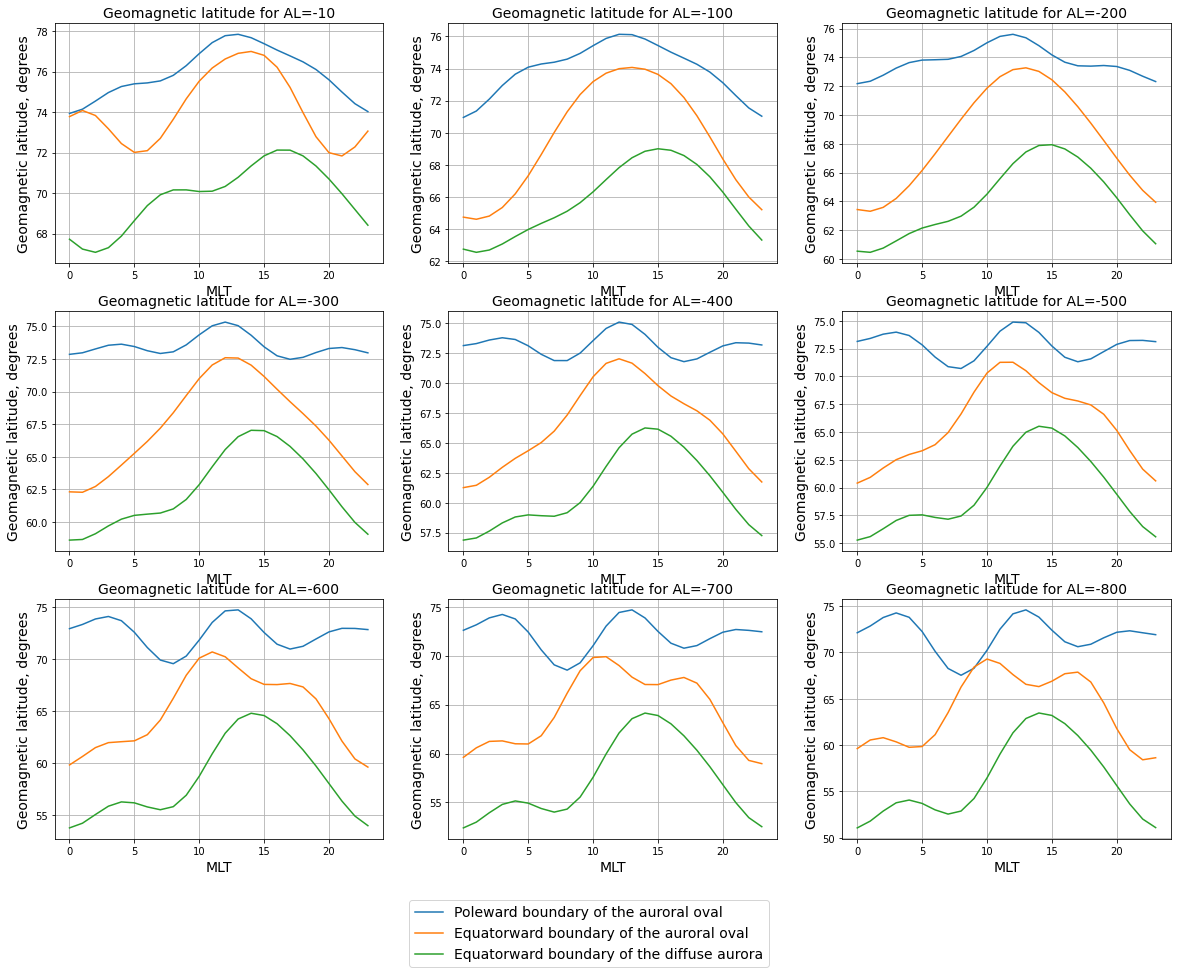

In [205]:
fig, ax = plt.subplots(3, 3, figsize=(20,15))

num = 0

for i in range(3):
    for j in range(3):
        ax[i, j].plot(t, theta_0[:, num])
        ax[i, j].plot(t, theta_1[:, num])
        ax[i, j].plot(t, theta_2[:, num])
        ax[i, j].set_title('Geomagnetic latitude for AL={AL:.0f}'.format(AL = AL[num]), fontsize=14)
        ax[i, j].set_xlabel('MLT', fontsize=14)
        ax[i, j].set_ylabel('Geomagnetic latitude, degrees', fontsize=14)
        ax[i, j].grid()
        num+=1

fig.legend(['Poleward boundary of the auroral oval', 'Equatorward boundary of the auroral oval',
            'Equatorward boundary of the diffuse aurora'], loc='lower center', fontsize=14)

plt.show()

**It is seen from the graphs that the smaller the absolute value of AL index, the higher the value of latitudes. The Auroral Electrojet index AL is a measure of global electrojet activity in the auroral zone, thus, if the activity is low, the auroral oval will be smaller in size meaning that the values of poleward and equatorward latitudes are high. Regarding the magnetic local time, it is noted that AL values are lower for the time when the magnetic meridian facing the opposite direction of the Sun (~0-10, ~20-0 MLT) which is obviously derived from the aforementioned fact about the relative position of the Sun.**

**Secondly, our task is to to reconstruct AL index using two approaches: from Kp indices and from solar wind speed values. For that, we need to download the data from the OMNIWeb page with the values of components of Interplanetary Magnetic Field (IMF) - By and Bz, solar wind speed, Kp indices and real AL values over a period of 2015 year:**

In [118]:
df = pd.read_csv('dataset.txt', header=None, delim_whitespace=True)

In [144]:
df.columns = ['Year', 'Day', 'Hour', 'By', 'Bz', 'Speed', 'Kp*10', 'AL']

**For the first option, we need to introduce special indices:**

In [140]:
c0 = 18
c1 = -12.3
c2 = 27.2
c3 = -2.0

**And calculate AL values from Kp index using the following formula:**

In [161]:
AL_1 = c0 + c1 * df['Kp*10']/10 + c2 * (df['Kp*10']/10) ** 2 + c3 * (df['Kp*10']/10) ** 3 

**For the second option, we need to calculate IMF clock angle taking into account that if the values of both IMF components are the same, we need to use previous value of the IMF clock angle:**

In [146]:
theta = np.zeros(len(df['By']))

for i in range(len(df['By'])):
    if df['By'][i] != df['Bz'][i]:
        theta[i] = np.arccos(df['Bz'][i] / (df['By'][i] ** 2 + df['Bz'][i] ** 2) ** 0.5)
    else:
        theta[i] = theta[i-1]

**Then, we introduce the function of energy which is directly dependent on the value of solar wind speed:**

In [180]:
alpha = 0.0044
E = df['Speed'] * (df['By'] ** 2 / 2 + df['Bz'] ** 2) ** 0.5 * np.sin(theta/2) ** 4 + alpha * df['Speed'] ** 2 * np.sin(theta/2) ** 0.5

**We use this function $E$ to find the values of E185 function which is used to calculate AL values:**

In [181]:
E185 = np.zeros(len(E))
for i in range(2, len(E)):
    E185[i] = (E[i-2] + 8 * E[i-1] + 5 * E[i]) / 14

**To calculate the AL values, we need to find the coefficients for polynomial using LSM:**

In [182]:
x = np.log10(E185[2:])
p = np.polyfit(x, df['AL'][2:], 4)
AL_2 = np.polyval(p, x);

**Finally, we plot the results:**

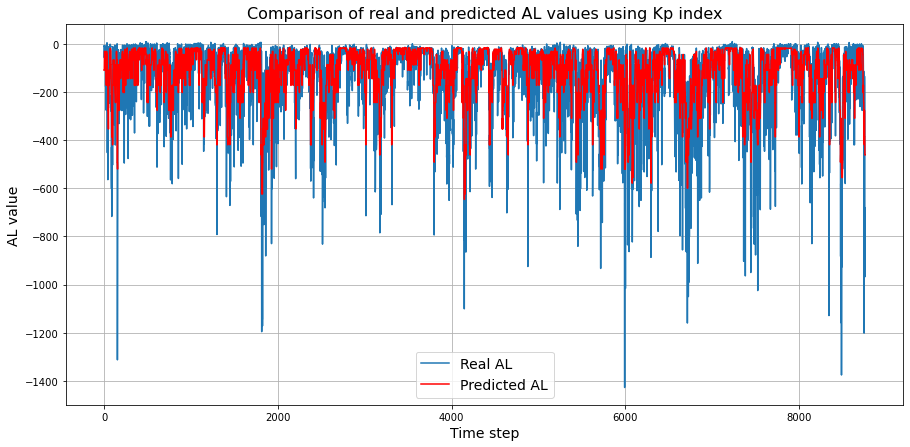

In [183]:
fig = plt.figure(figsize=(15,7))
plt.plot(df['AL'], label = 'Real AL')
plt.plot(-AL_1, 'r', label = 'Predicted AL')
plt.title('Comparison of real and predicted AL values using Kp index', fontsize=16)
plt.ylabel('AL value', fontsize=14)
plt.xlabel('Time step', fontsize=14)
plt.legend(fontsize=14)
plt.grid();

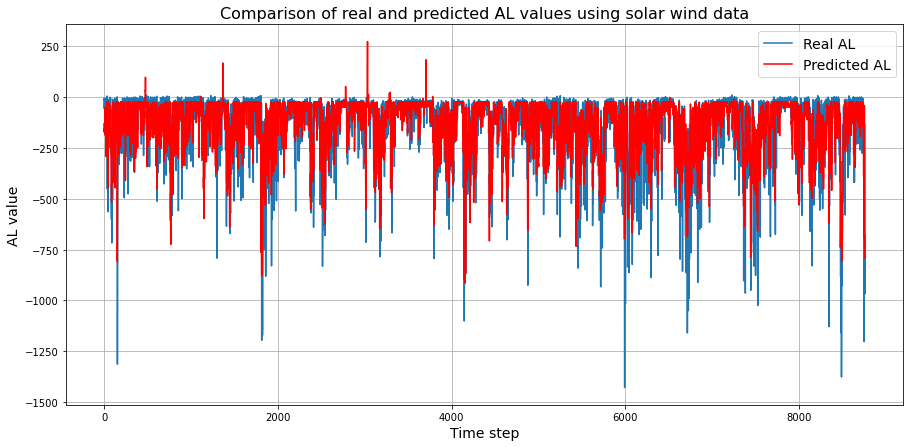

In [184]:
fig = plt.figure(figsize=(15,7))
plt.plot(df['AL'], label = 'Real AL')
plt.plot(AL_2, 'r', label = 'Predicted AL')
plt.title('Comparison of real and predicted AL values using solar wind data', fontsize=16)
plt.ylabel('AL value', fontsize=14)
plt.xlabel('Time step', fontsize=14)
plt.legend(fontsize=14)
plt.grid();

**It is clearly seen from the plots that the second model with solar wind values gives a better prediction of AL values. It may be explained by the correlation of solar wind speed with the electromagnetic disturbances in Earth’s magnetosphere and less precise approach with Kp values due to many sources of losses.**

In [187]:
def error(a, b):
    err = (np.sum((a-b)**2) / len(a)) ** 0.5
    return err

In [195]:
print('Root mean square error for Kp index method: %.0f' % error(AL_1, df['AL']), 'units.')
print('Root mean square error for solar wind method: %.0f' % error(AL_2, df['AL'][2:]), 'units.')

Root mean square error for Kp index method: 359 units.
Root mean square error for solar wind method: 90 units.


**The values of root mean square error also shows that the accuracy of the second option is much better than the approach with Kp indices.**

**Learning log:** In this assignment, we firstly learned how to reconstruct geomagnetic latitude of poleward, equatorward boundary of the auroral oval, and equatorward boundary of the diffuse aurora for various values of auroral electroject indices AL. As it was expected, it was seen that the higher the absolute AL value, the smaller the value of geomagnetic latitudes meaning that the higher the activity on the Sun, the bigger the auroral oval. In terms of magnetic local time, it was discovered that the higher AL absolute values corresponded to the "middle-day" hours (10-20 MLT) when the magnetic meridian faces the Sun. After that, we needed to compare to models for AL estimation - using Kp indices and using the solar wind speed values. To do that, we needed to download the necessary data from the OMNIWeb website and use it in various formulas to finally get the values of AL. As a result, the approach with the solar wind speed showed better predictions in comparison with the Kp indices method. It was explained by the fact that the solar wind speed might have a high correlation with the electromagnetic disturbances in Earth’s magnetosphere, thus, having a better interconnection between events rather than in the Kp method which actually may be less precise due to various sources of errors since it is more or less statistical data obtained from different points over the globe. Now we are familiar with aurora prediction which is a very useful skill if we want to plan the trip to northern parts of the world and see aurora with our own eyes one day.